In [16]:
from HEAD_RECON import threeD_head
from multi_head import MultiHead
import copy
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
head1 = threeD_head.read_from_file(1,7)
head2 = threeD_head.read_from_file(1,8)

In [11]:
head1.full_filter()
head2.full_filter()

depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.


In [3]:
head1 = threeD_head.load_from_pickle(1,1)
head2 = threeD_head.load_from_pickle(1,2)

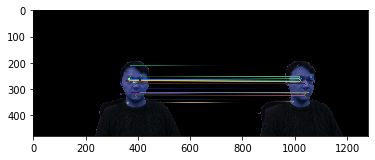

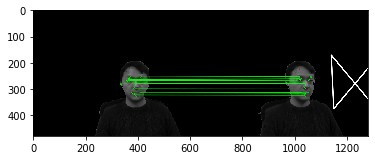

[[-0.05353813 -0.17600916 -0.02038162]
 [-0.04404113 -0.18751116 -0.02338162]
 [-0.04062113 -0.17768516 -0.02138162]
 [-0.03801813 -0.20061916 -0.02838162]
 [-0.02965313 -0.18436016 -0.02538162]
 [-0.02965313 -0.18436016 -0.02538162]
 [-0.02350313 -0.10226816 -0.02838162]
 [-0.01191613 -0.13077616 -0.03938162]
 [-0.00638413 -0.09488316 -0.03338162]
 [-0.00553613 -0.15788416 -0.03938162]
 [-0.00553613 -0.15788416 -0.03938162]
 [-0.00118213 -0.08482316 -0.03038162]
 [ 0.00190387 -0.09461216 -0.03138162]
 [ 0.02357487 -0.10201316 -0.02638162]
 [ 0.02326787 -0.18127116 -0.02838162]
 [ 0.03100887 -0.19906816 -0.03038162]]
[[-0.01420569 -0.17659403 -0.02294001]
 [ 0.00121931 -0.18656903 -0.02994001]
 [ 0.00303731 -0.17684403 -0.02794001]
 [ 0.00592331 -0.19943003 -0.03094001]
 [ 0.01268531 -0.18327303 -0.02794001]
 [ 0.01268531 -0.18327303 -0.02794001]
 [ 0.01566231 -0.10154403 -0.02994001]
 [ 0.03249031 -0.12781103 -0.03594001]
 [ 0.03317631 -0.09365603 -0.03094001]
 [ 0.03525831 -0.1567260

In [50]:
mhead = MultiHead.joined_heads(head1,head2)

In [14]:
int(mhead.heads[1].xyz.shape[0]*0.7)

36232

In [17]:
np.random.choice(np.arange(mhead.heads[1].xyz.shape[0]),10)

array([24169, 42274, 48630, 29178, 13073,  3264, 21888, 48934, 30634,
       46094])

In [55]:
mhead.icp_transform(0,1)

0
found the best fit transform 0
found the best fit transform 1
hallo
